<a href="https://colab.research.google.com/github/ritwiks9635/Tabular_Data_Projects_File/blob/main/Phishing_Site_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Phishing is a method of trying to gather personal information like login credentials or credit card information using deceptive e-mails or websites.***

***Phishing websites are created to dupe unsuspecting users into thinking they are on a legitimate site. The criminals will spend a lot of time making the site seem as credible as possible and many sites will appear almost indistinguishable from the real thing***

In [2]:
! unzip /content/https:/www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls/phishing-site-urls.zip

Archive:  /content/https:/www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls/phishing-site-urls.zip
  inflating: phishing_site_urls.csv  


In [3]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("phishing_site_urls.csv")
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [6]:
data.Label.value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

In [7]:
data[data.Label == "good"]

,URL,Label
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good
...,...,...
483590,youthleaguesusa.com/potomacsoccer/2011/Tournam...,good
483591,zip-codes.com/,good
483592,owens.edu/news-releases/?p=2052,good
483593,1.safesecureweb.com/egale/index.asp?item=1173,good


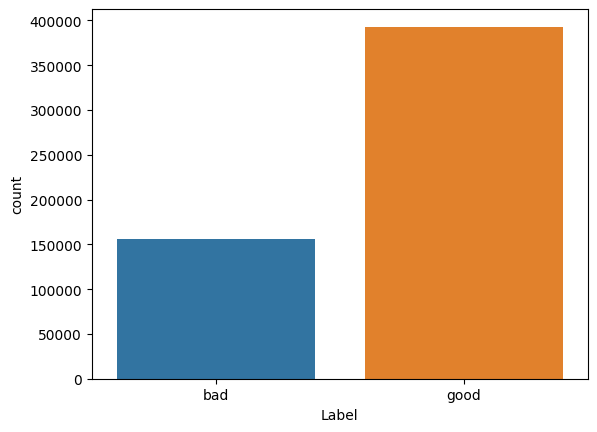

In [8]:
sns.countplot(x = "Label", data = data)
plt.show()

In [9]:
data.shape

(549346, 2)

In [10]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

In [11]:
tokenizer = RegexpTokenizer(r"[A-Za-z]+")
tokenizer

RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [12]:
data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [13]:
tokenizer.tokenize(data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [14]:
# Tokenizing all the rows
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.527924058999986 sec


In [15]:
data.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [16]:
stemmer = SnowballStemmer("english")

In [17]:
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stemmed'] = data['text_tokenized'].map(lambda x: [stemmer.stem(word) for word in x])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 62.367602352000006 sec


In [18]:
data.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [19]:
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stent'] = data['text_stemmed'].map(lambda x: ' '.join(x))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 0.32631036700001914 sec


In [20]:
data.head()

,URL,Label,text_tokenized,text_stemmed,text_stent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [27]:
bad_sites = data[data.Label == "bad"]
good_sites = data[data.Label == "good"].sample(156422)

In [28]:
bad_sites.shape

(156422, 5)

In [29]:
good_sites.shape

(156422, 5)

In [30]:
data = pd.concat([good_sites, bad_sites])
data.head()

,URL,Label,text_tokenized,text_stemmed,text_stent
83431,www.pysoft.com/ActualDrawingMainPage.html,good,"[www, pysoft, com, ActualDrawingMainPage, html]","[www, pysoft, com, actualdrawingmainpag, html]",www pysoft com actualdrawingmainpag html
239150,shs.umsystem.edu/manuscripts/invent/0107.html,good,"[shs, umsystem, edu, manuscripts, invent, html]","[shs, umsystem, edu, manuscript, invent, html]",shs umsystem edu manuscript invent html
387538,metacafe.com/watch/1024931/ito_hitomi/,good,"[metacafe, com, watch, ito, hitomi]","[metacaf, com, watch, ito, hitomi]",metacaf com watch ito hitomi
346497,godsgracecc.com/falling-leaves,good,"[godsgracecc, com, falling, leaves]","[godsgracecc, com, fall, leav]",godsgracecc com fall leav
174930,en.wikipedia.org/wiki/Game_(2011_film),good,"[en, wikipedia, org, wiki, Game, film]","[en, wikipedia, org, wiki, game, film]",en wikipedia org wiki game film


In [32]:
data.Label.value_counts()

good    156422
bad     156422
Name: Label, dtype: int64

In [33]:
cv = CountVectorizer()
feature = cv.fit_transform(data.text_stent)

In [41]:
data.shape

(312844, 5)

In [42]:
feature.toarray().shape

(312844, 244858)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
data["Label"] = le.fit_transform(data.Label)

In [37]:
data.Label.value_counts()

1    156422
0    156422
Name: Label, dtype: int64

In [38]:
data.shape

(312844, 5)

In [39]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(feature,  data.Label, test_size=0.2, random_state= 42)

In [53]:
y_train

543027    0
258403    1
103553    0
449927    1
401426    1
         ..
482095    1
495680    0
285141    1
310418    1
220606    1
Name: Label, Length: 250275, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
lr.score(x_test,y_test)

0.9588294522846778

In [58]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(x_test,y_test),2)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

Training Accuracy : 0.980873039656378
Testing Accuracy : 0.9588294522846778

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.97      0.96     30773
        Good       0.97      0.95      0.96     31796

    accuracy                           0.96     62569
   macro avg       0.96      0.96      0.96     62569
weighted avg       0.96      0.96      0.96     62569


CONFUSION MATRIX


<Axes: >

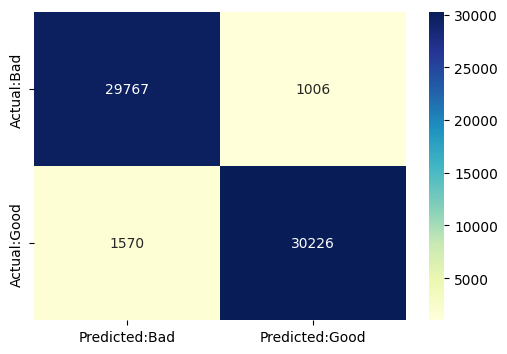

In [63]:
print('Training Accuracy :',lr.score(x_train,y_train))
print('Testing Accuracy :',lr.score(x_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(x_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(x_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")